<a href="https://colab.research.google.com/github/j-cunanan/MLT-contributions/blob/master/FFTtour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio

print(tf.__version__)

2.2.0-rc2


In [0]:
def Vstripes(n=100,m=100,A=1,B=1):
  sine=np.zeros([n,m])

  for x in range(n):
    for y in range(m):
      sine[x,y] = A*np.sin([B*y])
  return sine

def Hstripes(n=100,m=100,A=1,B=1):
  sine=np.zeros([n,m])

  for y in range(n):
    for x in range(m):
      sine[x,y] = A*np.sin([B*x])
  return sine

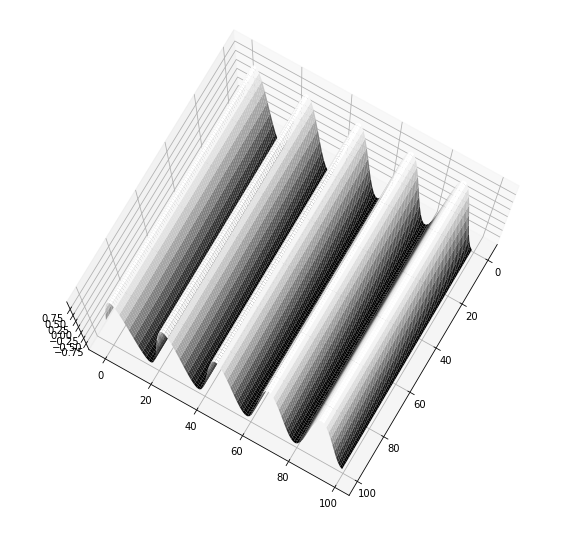

In [0]:
from mpl_toolkits.mplot3d import Axes3D
#import cv2
def IntensityPlot(im):
  xx, yy = np.mgrid[0:im.shape[0], 0:im.shape[1]]
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.plot_surface(xx, yy, im ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
  ax.view_init(80, 30)
  plt.show()

IntensityPlot(Vstripes(B=.3))

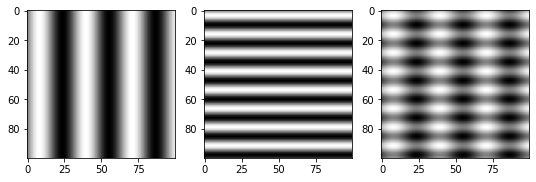

In [0]:
f10 = Vstripes(B=.2)
f01 = Hstripes(B=.5)
f11 = f10+f01


fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(9,5))

ax1.imshow(f10, cmap='gray')
ax2.imshow(f01, cmap='gray')
ax3.imshow(f11, cmap='gray')

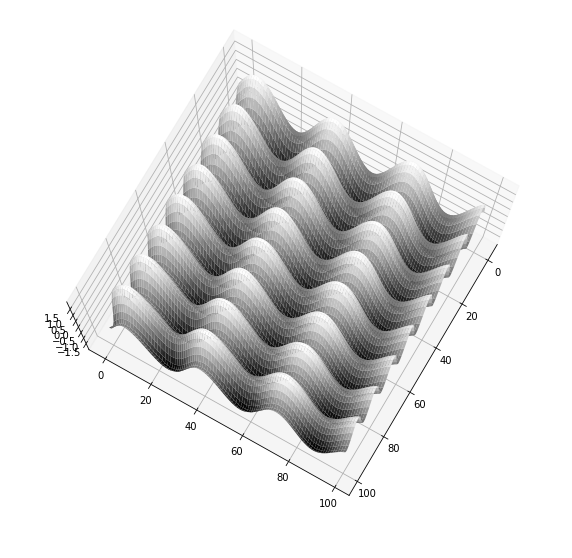

In [0]:
IntensityPlot(f11)

In [0]:
def FourierView(im):
  im_ft = tf.abs(tf.signal.fftshift(tf.signal.fft2d(tf.cast(im, tf.complex64))))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(im_ft, cmap='gray')

def logFourierView(im):
  im_ft = tf.abs(tf.signal.fftshift(tf.signal.fft2d(tf.cast(im, tf.complex64))))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(tf.math.log(im_ft), cmap='gray')

def iFourierView(im):
  im_ft = tf.abs(tf.signal.ifft2d(im))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(im_ft, cmap='gray')

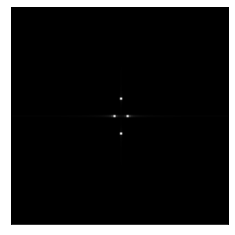

In [0]:
FourierView(f11) # gives a geometric description of the image in the spatial domain

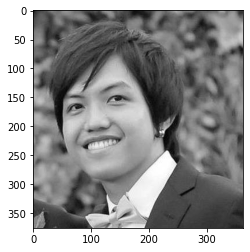

In [0]:
from skimage import color

im = imageio.imread('/content/drive/My Drive/ProfilePic/download.png')
im = color.rgb2gray(im)
plt.imshow(im[:,:], cmap='gray')

In [0]:
im.shape

(376, 363)

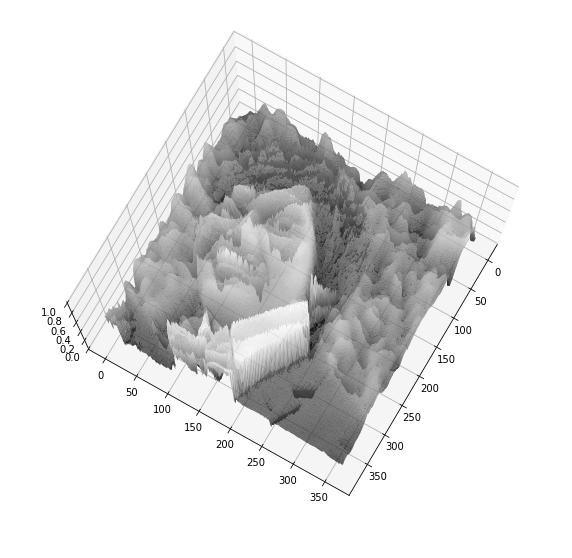

In [0]:
IntensityPlot(im)

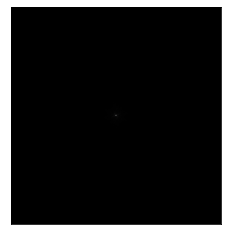

In [0]:
FourierView(im)

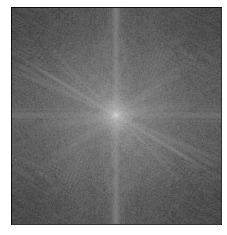

In [0]:
logFourierView(im)

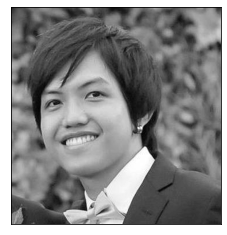

In [0]:
im_ft = tf.signal.fft2d(tf.cast(im, tf.complex64))
iFourierView(im_ft)

In [0]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [0]:
def ReconViewer(t=0):
  M = np.abs(im_ft).max()
  thres = np.abs(im_ft) > t/10000*M
  im_t = im_ft*thres
  percent = 100*thres.sum()/(im_ft.shape[0]*im_ft.shape[1])
  print(f'Image reconstruction using {thres.sum()} frequencies or around {np.round(percent, decimals=4)} percent of available frequencies')

  return iFourierView(im_t)

In [0]:
interact(ReconViewer,t=widgets.IntSlider(min=0, max=1100, step=1, value=945))

interactive(children=(IntSlider(value=945, description='t', max=1100), Output()), _dom_classes=('widget-intera…

<function __main__.ReconViewer>

# KERNEL:FILTERS as CONVOLUTIONS:FOURIER MULTIPLIERS

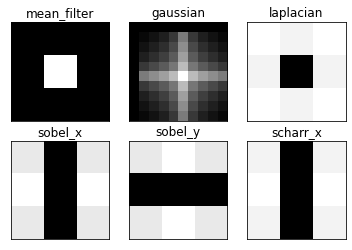

In [0]:
import cv2

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(10,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1e-6) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

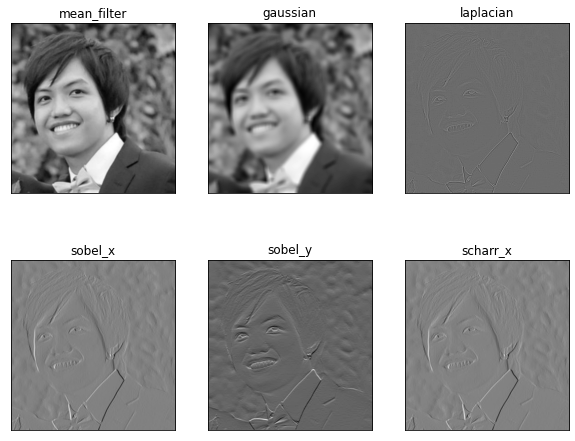

In [0]:
im_fltr = [cv2.filter2D(im,-1,kernel) for kernel in filters]
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(im_fltr[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

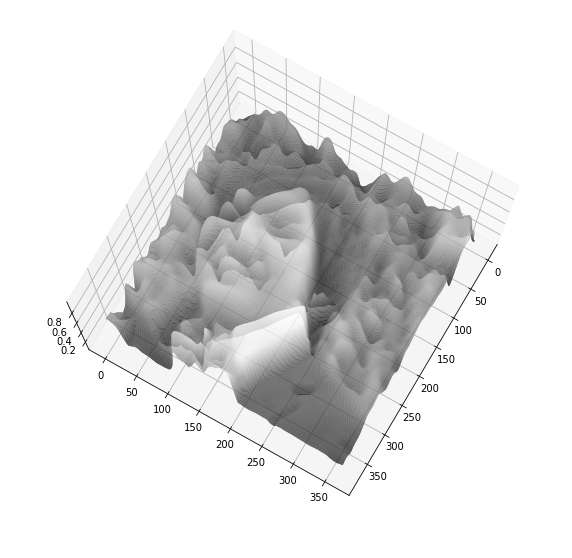

In [0]:
IntensityPlot(im_fltr[1])

# A little bit of SVD

In [0]:
s, u, v = tf.linalg.svd(im)

s.shape, u.shape,tf.linalg.diag(s).shape, v.shape

(TensorShape([363]),
 TensorShape([376, 363]),
 TensorShape([363, 363]),
 TensorShape([363, 363]))

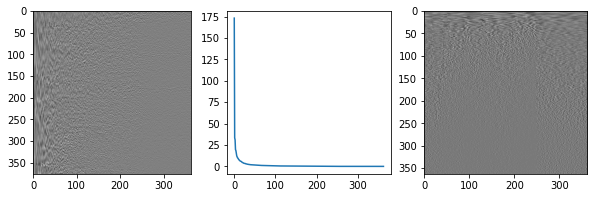

In [0]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

#fig.figure()
axes[0].imshow(u, cmap='gray')
axes[1].plot(s)
axes[2].imshow(tf.transpose(v), cmap='gray')

In [0]:
def SVD(A,k,scaler=None):
  s, u, v = tf.linalg.svd(A)
  if scaler is None:
    Ak = u[:,0:k]@tf.linalg.diag(s[0:k])@tf.transpose(v[:,0:k], conjugate=True)
    plt.imshow(Ak, cmap='gray')
    return Ak
  else:
    dil = tf.constant(scaler, shape=(k,),dtype=tf.float64)
    Ak = u[:,0:k]@tf.linalg.diag(s[0:k]*dil)@tf.transpose(v[:,0:k], conjugate=True)
    plt.imshow(Ak, cmap='gray')

    return Ak

In [0]:
def SVDviewer(k=1):
  percent = k/len(s)*100
  print(f'Using only {np.round(percent,3)} percent of all singular values')
  SVD(im,k)
  
interact(SVDviewer,k=widgets.IntSlider(min=1, max=363, step=1, value=1))

interactive(children=(IntSlider(value=1, description='k', max=363, min=1), Output()), _dom_classes=('widget-in…

<function __main__.SVDviewer>

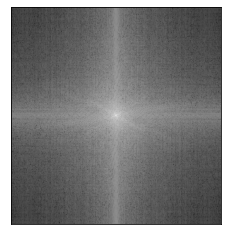

In [0]:
im_svd = SVD(im,37)
logFourierView(im_svd)

In [0]:
def SVD2viewer(k=1):
  percent = k/len(s)*100
  print(f'Using only {np.round(percent,3)} percent of all singular values')
  SVD(im,k,[i*i for i in range(1,k+1)])
  
interact(SVD2viewer,k=widgets.IntSlider(min=1, max=363, step=1, value=1))

interactive(children=(IntSlider(value=1, description='k', max=363, min=1), Output()), _dom_classes=('widget-in…

<function __main__.SVD2viewer>

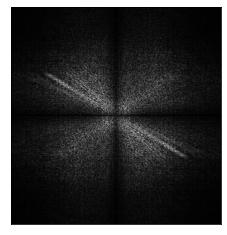

In [0]:
FourierView(SVD(im,100,[i*i for i in range(1,101)]))

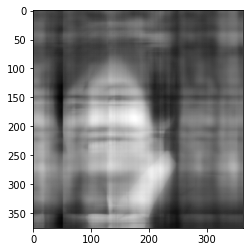

In [0]:
 ghost = SVD(im,100,[1/(i) for i in range(1,101)])

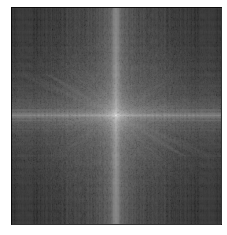

In [0]:
logFourierView(ghost)

In [0]:
def Distortion(im,recon):
  square_dif = (recon-im)**2
  l2 = np.sqrt(np.sum(square_dif))
  norm = l2 / np.sqrt(np.sum(im))
  return 100*norm